# Homework 5

Use the Newton-Raphson method to solve a system of equations.

Find the solution for 

\begin{equation}
x_{1}^2+x_{1}x_{2}=10
\end{equation}

\begin{equation}
x_{2}+3x_{1}x_{2}^2=57
\end{equation}

### Numerical Solutions

\begin{equation}
f_{i}(x_{1},x_{2},...,x_{N})=0, \qquad i=1,2,....,N
\end{equation}

\begin{equation}
{\bf f(x)}=\left[ \begin{array}{c} f_{1}(\bf{x}) \\ f_{2}(\bf{x})  \end{array}\right] = \left[ \begin{array}{c} x_{1}^2+x_{1}x_{2}-10 \\ x_{2}+3x_{1}x_{2}^2-57 \end{array}\right] =0 
\end{equation}

Make a guess ($x_{1},x_{2}$), and then correct it ($\Delta x_{1},\Delta x_{2}$), we have

\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})=0 \qquad, i=1,2
\end{equation}
We can expand it using Taylor series

\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})\simeq f_{i}(x_{1},x_{2})+\frac{\partial f_{i}}{\partial x_{1}}\Delta x_{1}+\frac{\partial f_{i}}{\partial x_{2}}\Delta x_{2}=0 \qquad i=1,2
\end{equation}

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =0 
\end{equation}

So we want to solve the matrix equation

\begin{equation}
F'\Delta {\bf{x}}=-\bf{f}
\end{equation}
Here we use bold font for a vector, the captal letter to represent a matrix

For 2x2 array,

\begin{equation}
 \begin{bmatrix} a & b \\c & d \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =-\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] 
\end{equation}
The solution is

\begin{equation}
\Delta x_1=\frac{bf_2-df_1}{ad-bc}
\end{equation}

\begin{equation}
\Delta x_2=\frac{cf_1-af_2}{ad-bc}
\end{equation}

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable


def f1(x1,x2):
    return (x1*x1+x1*x2-10.)

def f2(x1,x2):
    return (x2+3*x1*x2*x2-57)

def f1x1(x1,x2):
    return 2*x1 + x2

def f1x2(x1,x2):
    return x1
    
def f2x1(x1,x2):
    return 3*x2**2
    
def f2x2(x1,x2):
    return 1 + 6*x1*x2
    
def dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2):
    a = f1x1(x1,x2)
    b = f1x2(x1,x2)
    c = f2x1(x1,x2)
    d = f2x2(x1,x2)
    return (b*f2(x1,x2) - d*f1(x1,x2)) / (a*d-b*c)

def dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2):
    a = f1x1(x1,x2)
    b = f1x2(x1,x2)
    c = f2x1(x1,x2)
    d = f2x2(x1,x2)
    return (c*f1(x1,x2) - a*f2(x1,x2)) / (a*d - b*c)

def newton(
    f1: Callable,
    f2: Callable,
    f1x1: Callable,
    f1x2: Callable,
    f2x1: Callable,
    f2x2: Callable,
    x1: float,
    x2: float,
    eps: float,
    n_max: int
):
    for i in range(n_max):
        x1 = x1 + dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
        x2 = x2 + dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
        if f1(x1,x2)<eps and f2(x1,x2)<eps:
            print(f'Solution found after {i} iterations')
            break
    return x1,x2

### Now lets plot them so we can make a good guess

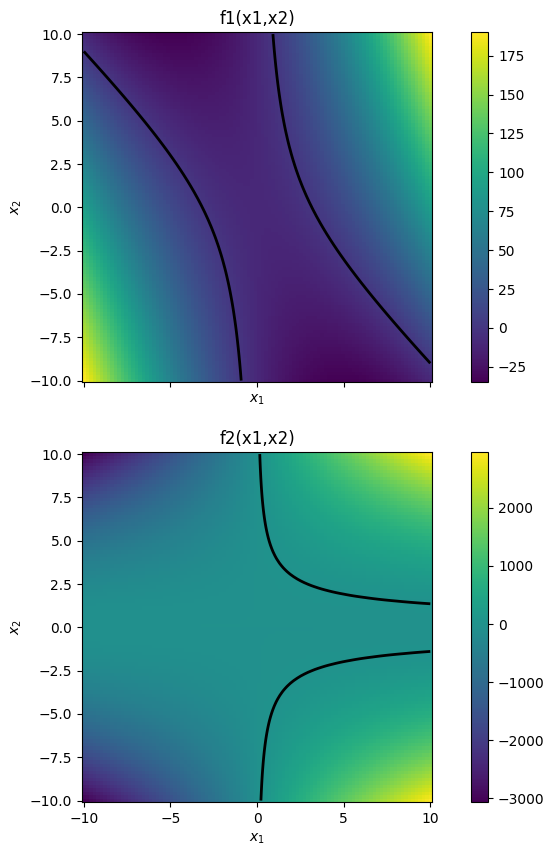

In [6]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

def make_plot(
    fig: plt.Figure,
    ax1: plt.Axes,
    ax2: plt.Axes,
    f1: Callable,
    f2: Callable,
    x1: np.ndarray,
    x2: np.ndarray
):
    xx1,xx2 = np.meshgrid(x1,x2)
    # fig,ax = plt.subplots(2,1,sharex=True,figsize = (10,10))

    im = ax1.pcolormesh(x1,x2,f1(xx1,xx2))
    ax1.contour(x1,x2,f1(xx1,xx2),levels=[0],colors='k',linewidths=2)
    fig.colorbar(im,ax=ax1)
    ax1.set_title('f1(x1,x2)')
    im = ax2.pcolormesh(x1,x2,f2(xx1,xx2))
    ax2.contour(x1,x2,f2(xx1,xx2),levels=[0],colors='k',linewidths=2)
    fig.colorbar(im,ax=ax2)
    ax2.set_title('f2(x1,x2)')
    for _ax in [ax1,ax2]:
        _ax.set_aspect('equal')
        _ax.set_xlabel('$x_1$')
        _ax.set_ylabel('$x_2$')

fig,ax = plt.subplots(2,1,sharex=True,figsize = (10,10))
make_plot(
    fig,
    ax[0],
    ax[1],
    f1,
    f2,
    x1,
    x2
)



### Find a solution

Solution found after 3 iterations
x1 = 4.393744193290212
x2 = -2.1177810147149576
f1(x1,x2) = 7.357670028795837e-12
f2(x1,x2) = 6.414069275706424e-11


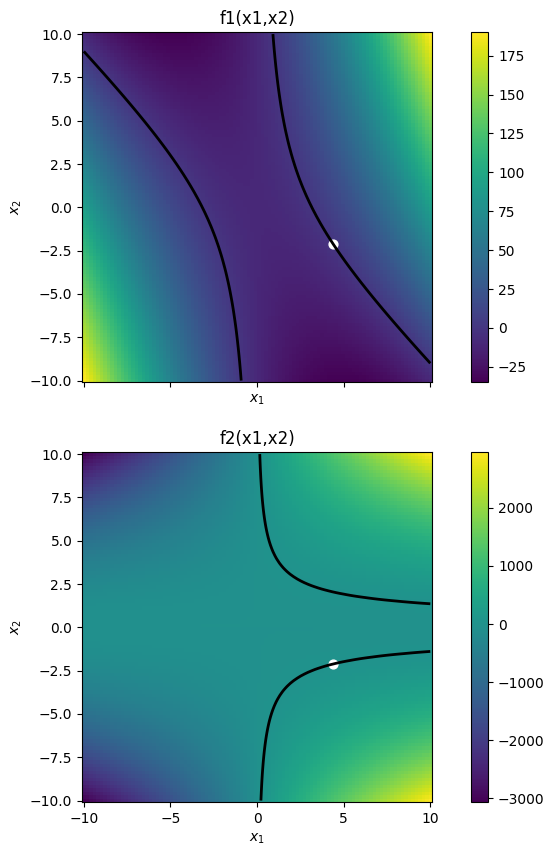

In [13]:
x1_0 = 5
x2_0 = -3
eps = 1e-8
n_max = 100
x1,x2 = newton(f1,f2,f1x1,f1x2,f2x1,f2x2,x1_0,x2_0,eps,n_max)
print(f'x1 = {x1}\nx2 = {x2}')
print(f'f1(x1,x2) = {f1(x1,x2)}')
print(f'f2(x1,x2) = {f2(x1,x2)}')
fig,ax = plt.subplots(2,1,sharex=True,figsize = (10,10))
make_plot(
    fig,
    ax[0],
    ax[1],
    f1,
    f2,
    np.linspace(-10,10,100),
    np.linspace(-10,10,100)
)
for _ax in ax:
    _ax.scatter(x1,x2,c='w',s=40)

### We can do this for all solutions too

Solution found after 4 iterations
Solution found after 3 iterations
Solution found after 18 iterations
Solution found after 8 iterations
Solution found after 5 iterations


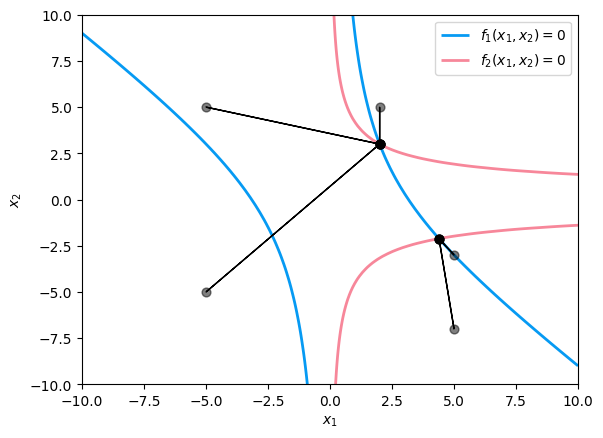

In [67]:
fig,ax = plt.subplots(1,1)
ax: plt.Axes
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1,xx2 = np.meshgrid(x1,x2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

c1 = ax.contour(x1,x2,f1(xx1,xx2),levels=[0],colors='xkcd:azure',linewidths=2)
c1.legend_elements()[0][0].set_label('$f(x1,x2) = 0$')
c2 = ax.contour(x1,x2,f2(xx1,xx2),levels=[0],colors='xkcd:rose pink',linewidths=2)
ax.legend(
    handles=[c1.legend_elements()[0][0], c2.legend_elements()[0][0]],
    labels=['$f_1(x_1,x_2) = 0$', '$f_2(x_1,x_2) = 0$']
)

guesses = [
    (2,5),
    (5,-3),
    (-5,5),
    (-5,-5),
    (5,-7)
]
eps = 1e-8
n_max = 100
for (x1_guess,x2_guess) in guesses:
    ax.scatter(x1_guess,x2_guess,c='k',s=40,alpha=0.5,zorder=200)
    x1, x2 = newton(f1,f2,f1x1,f1x2,f2x1,f2x2,x1_guess,x2_guess,eps,n_max)
    ax.scatter(x1,x2,c='k',s=40,zorder=200)
    ax.arrow(x1_guess,x2_guess,x1-x1_guess,x2-x2_guess,head_width=0.1,head_length=0.1,fc='k',ec='k',zorder=200)


### I'm interested to see what the paths are

Solution found after 4 iterations
Solution found after 3 iterations
Solution found after 8 iterations
Solution found after 5 iterations


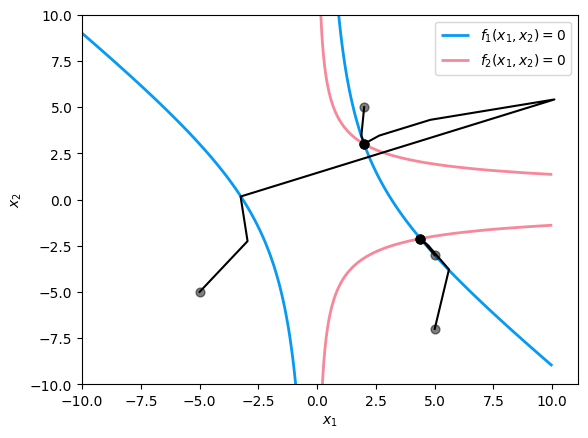

In [75]:
def newton2(
    f1: Callable,
    f2: Callable,
    f1x1: Callable,
    f1x2: Callable,
    f2x1: Callable,
    f2x2: Callable,
    x1: float,
    x2: float,
    eps: float,
    n_max: int
):
    x1s = [x1]
    x2s = [x2]
    for i in range(n_max):
        x1 = x1 + dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
        x2 = x2 + dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
        x1s.append(x1)
        x2s.append(x2)
        if f1(x1,x2)<eps and f2(x1,x2)<eps:
            print(f'Solution found after {i} iterations')
            break
    return np.array(x1s),np.array(x2s)
fig,ax = plt.subplots(1,1)
ax: plt.Axes
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1,xx2 = np.meshgrid(x1,x2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

c1 = ax.contour(x1,x2,f1(xx1,xx2),levels=[0],colors='xkcd:azure',linewidths=2)
c1.legend_elements()[0][0].set_label('$f(x1,x2) = 0$')
c2 = ax.contour(x1,x2,f2(xx1,xx2),levels=[0],colors='xkcd:rose pink',linewidths=2)
ax.legend(
    handles=[c1.legend_elements()[0][0], c2.legend_elements()[0][0]],
    labels=['$f_1(x_1,x_2) = 0$', '$f_2(x_1,x_2) = 0$']
)

guesses = [
    (2,5),
    (5,-3),
    # (-5,5),
    (-5,-5),
    (5,-7)
]
eps = 1e-8
n_max = 100
for (x1_guess,x2_guess) in guesses:
    ax.scatter(x1_guess,x2_guess,c='k',s=40,alpha=0.5,zorder=200)
    x1s, x2s = newton2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1_guess,x2_guess,eps,n_max)
    ax.scatter(x1s[-1],x2s[-1],c='k',s=40,zorder=200)
    ax.plot(x1s,x2s,c='k',zorder=100)
